In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [234]:
job="analyst_roles"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [235]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                   12
company_rating           60
standardized_job_role     0
dtype: int64

In [236]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [237]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
1,General Mills,Sr. D&T Analyst – Commercial Capabilities,India,0.0,"Cloud infrastructure, Oracle, Kanban, Salesfor...",4.1,Analyst Roles
3,Hyland Software,Competitive Intelligence Analyst 2,Remote,0.0,"Research, Analysis skills, Project management,...",3.7,Analyst Roles
6,Micron,Geopolitical Intelligence Analyst,Hyderābād,0.0,"English, Research, Analysis skills, Data visua...",3.8,Analyst Roles
8,MMIT,Configuration Analyst,Remote,0.0,"Jira, Technical support, Microsoft Office, Ana...",3.8,Analyst Roles
12,Maruti Suzuki India Ltd,DM/MGR Business Research Analyst,Delhi,0.0,"Computer literacy, Research, Presentation skil...",3.8,Analyst Roles
...,...,...,...,...,...,...,...
480,ASSYSTEM,SOC L1 Analyst,Gurgaon,0.0,"English, Information security, Project managem...",3.2,Analyst Roles
482,American Express Global Business Travel,Product Strategic Planning & Performance Analyst,Haryana,0.0,"Jira, Power BI, Microsoft Excel, Tableau, Fina...",4.1,Analyst Roles
492,Ultimez,Crypto Market Analyst And Writer,Remote,0.0,"Google Docs, Keyword research, Recruiting, Sof...",4.0,Analyst Roles
495,Accenture,Copywriting Analyst,Mumbai,0.0,"Keyword research, Content creation, SEO, Proof...",3.8,Analyst Roles


### Filling the null values by replacing with average salary of company rating

In [239]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [240]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [241]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,General Mills,"D&T Analyst II – Marketing Technology, Sites &...",Mumbai,102.000000,"Cloud infrastructure, Software troubleshooting...",4.1,Analyst Roles
1,General Mills,Sr. D&T Analyst – Commercial Capabilities,India,73.161290,"Cloud infrastructure, Oracle, Kanban, Salesfor...",4.1,Analyst Roles
2,Citi,Apps Dev Tech Lead Analyst - C13 - PUNE,Pune,42.000000,"Oracle, Management, React, Tomcat, Spark",3.7,Analyst Roles
3,Hyland Software,Competitive Intelligence Analyst 2,Remote,76.457143,"Research, Analysis skills, Project management,...",3.7,Analyst Roles
4,"SmartWinnr, Hyderabad",Incentive Analyst,India,7.500000,"Power BI, Data modeling, Microsoft Excel, Data...",0.0,Analyst Roles
...,...,...,...,...,...,...,...
497,fluidonomics Solutions,News Analyst,Pune,66.000000,"Microsoft Word, Microsoft Outlook, English, Mi...",4.4,Analyst Roles
498,RMSI,Analyst,Noida,5.000000,"English, Analysis skills, Technical writing, C...",3.4,Analyst Roles
499,TELUS Digital -,PRP Writer Analyst - Mumbai India,India,66.057600,"Arabic, Bengali, English, Communication skills",3.6,Analyst Roles
500,CANPACK,Global HRIS Analyst,Pune,78.000000,"Analysis skills, Project management, Agile, Co...",3.6,Analyst Roles


In [242]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [243]:
df.describe()

,salary_lpa,company_rating
count,502.000000,502.000000
mean,66.620990,3.374502
std,86.819171,1.301629
min,0.720000,0.000000
25%,20.580000,3.425000
50%,72.000000,3.800000
75%,84.000000,4.000000
max,1200.960000,5.000000


In [244]:
df.nunique()

### Exporting the cleaned Dataframe to anylze it further

In [ ]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [246]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [247]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                    Skill  Count
19        microsoft excel    151
4         analysis skills    107
35   microsoft powerpoint     89
17               power bi     87
25                english     84
..                    ...    ...
235           pegasystems      1
72               docusign      1
239                   nfs      1
243             iso 27001      1
350          linkbuilding      1

[351 rows x 2 columns]


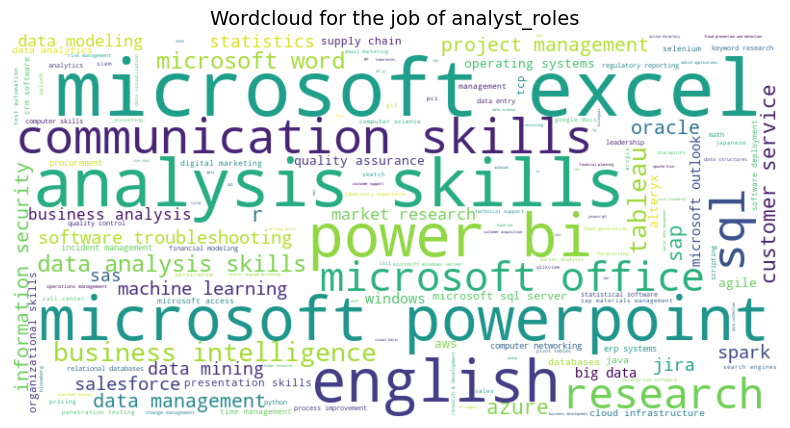

In [248]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


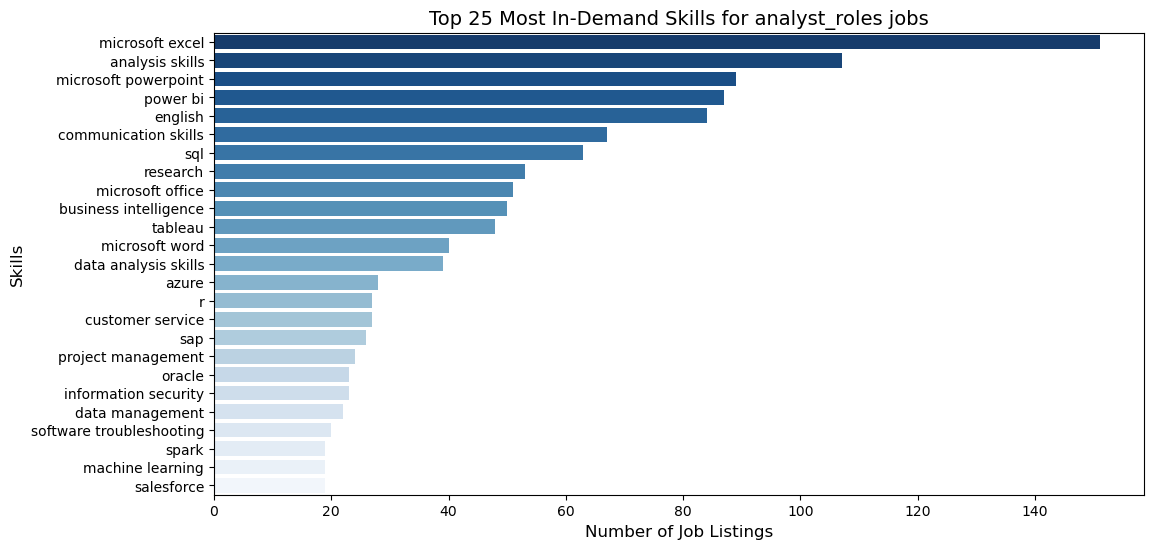

In [249]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [251]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


               company_name   salary_lpa
222                PTC Inc.  1100.160000
250           Resource Tree   240.000000
185              Mastercard   231.730909
78                 Deloitte   217.930549
145  Ingredion Incorporated   210.000000
322                    Zazz   180.000000
64               Concentrix   144.000000
65                  Contify   144.000000
123  Gritstone Technologies   138.000000
124                Growisto   135.656471


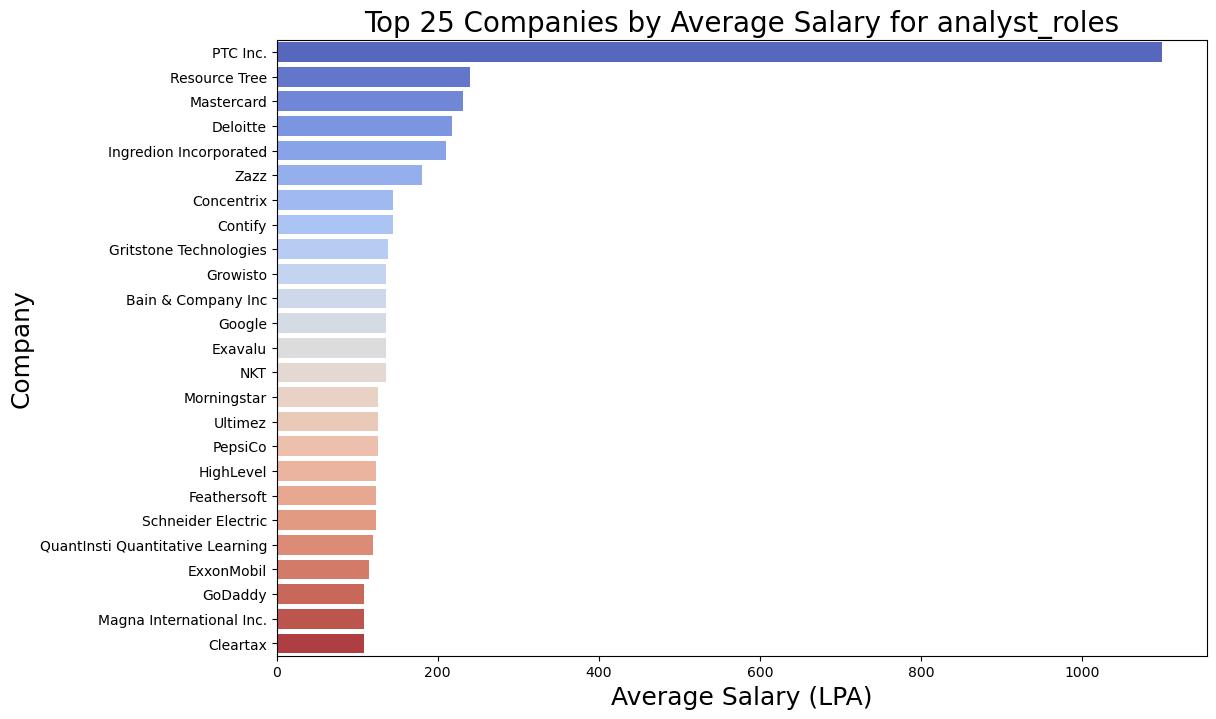

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

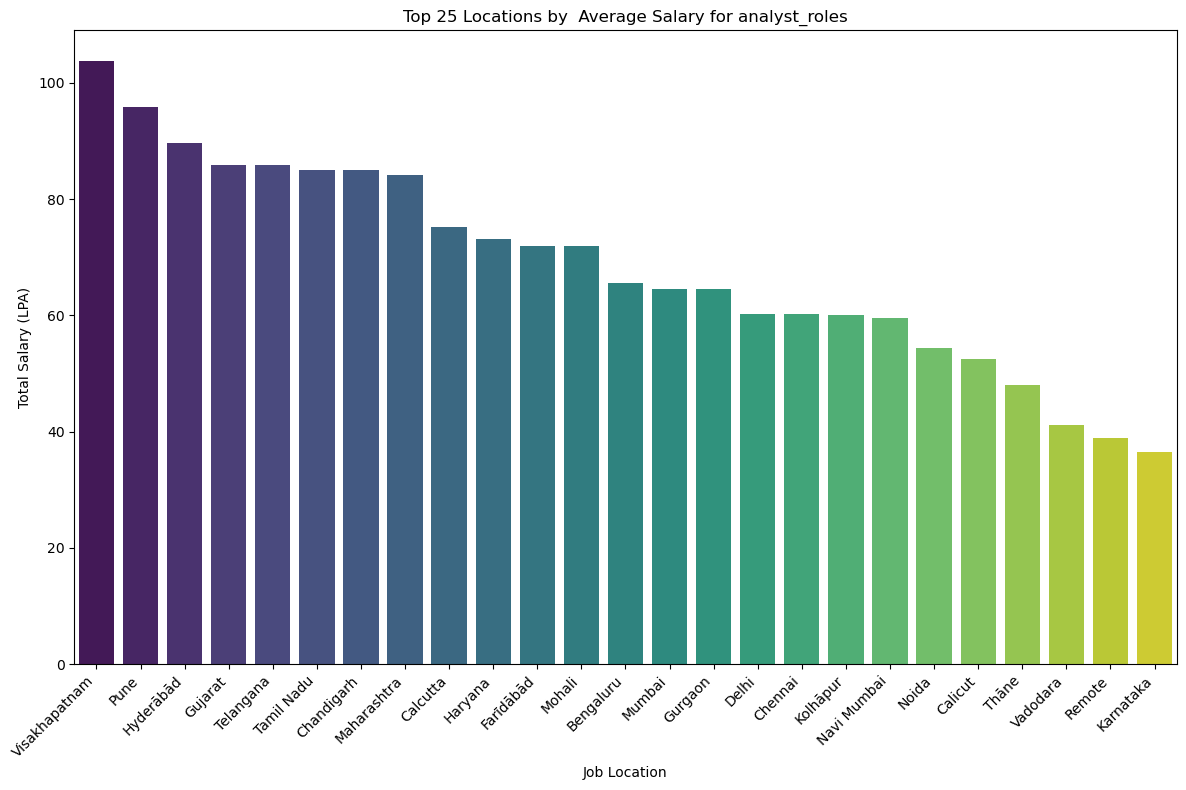

In [254]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

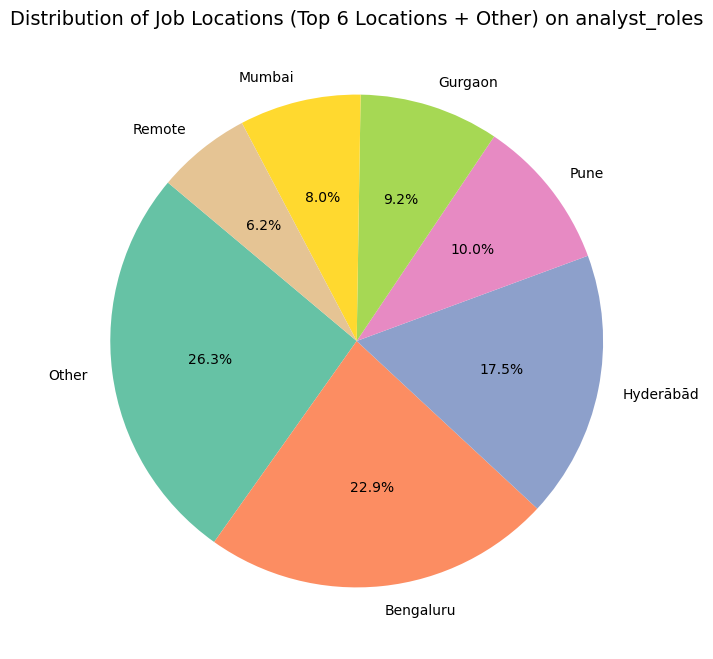

In [255]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

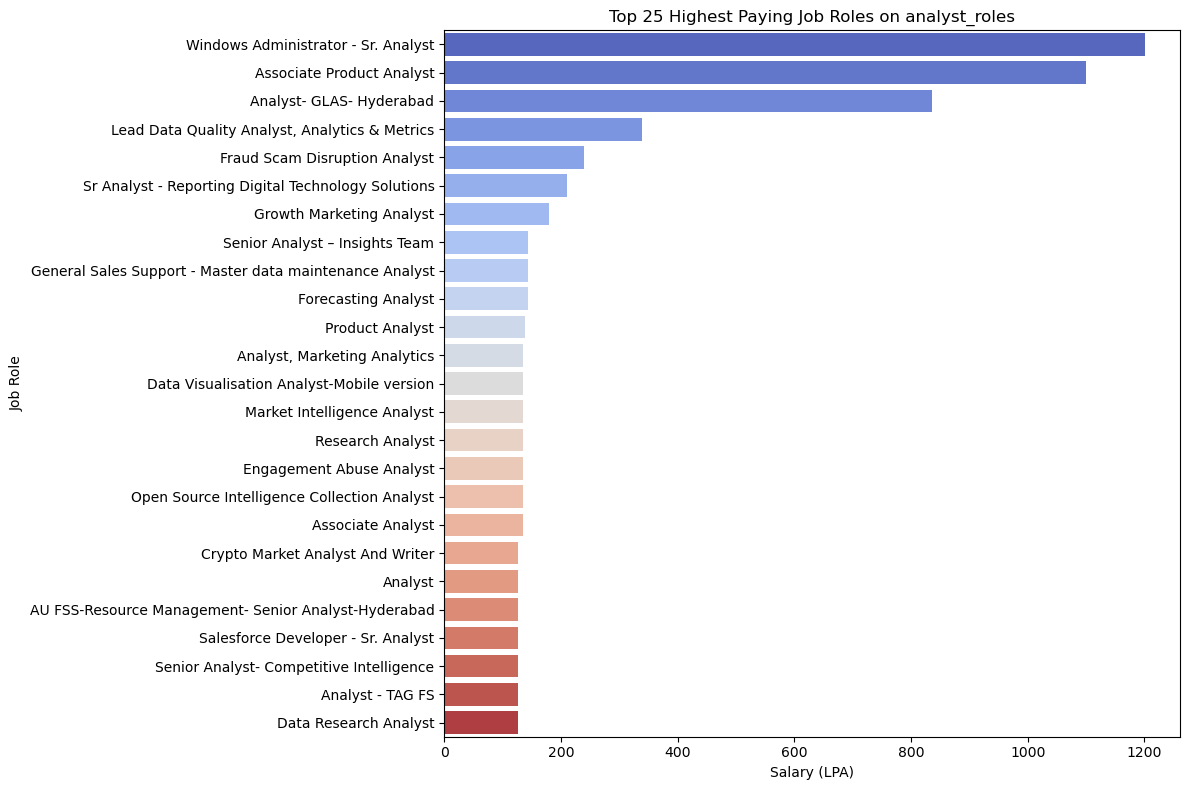

In [257]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [259]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_20500\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


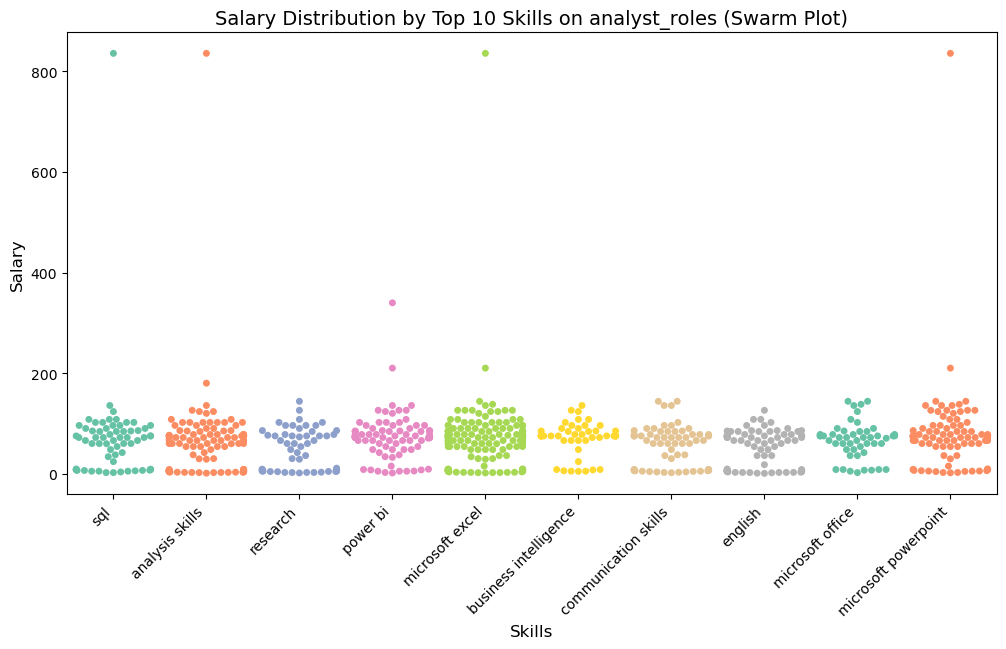

In [260]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

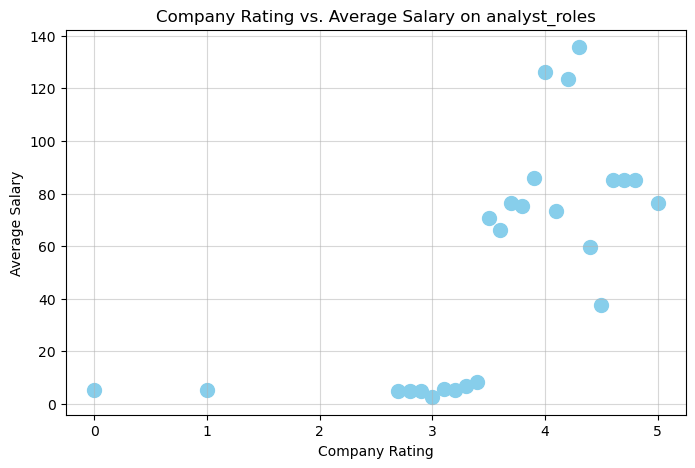

In [262]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [263]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.2620307601032688